COJOINT ANALYSIS USING NETFLIX CUSTOMER MOCK DATA 

In [26]:
# Libaries and Data for exploratory Analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
# loading Data
df = pd.read_csv('./data/netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


Data Processing

In [7]:
#isolate Y and y 
y = df.selected
X = df.drop(columns=['selected','customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [9]:
# Create dummy Variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


Regression Model

In [22]:
# Build the Regression Model
model = sm.GLM(y,
               X_dummy,
              family = sm.families.Binomial()).fit()

            
        
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1949.6
Date:                Sun, 07 Jul 2024   Deviance:                       3899.2
Time:                        04:21:22   Pearson chi2:                 2.99e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08290
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1             -1.694e+13   1.08e+13     -1.570      0.116   -3.81e+13    4.21e+12
NumberAccounts_2             -1.694e+13   1.08e+13     -1.570      0.116   -3.81e+13    4.21e+12
NumberAccounts_3             -1.694e+13   1.08e+13     -1.570      0.116   -3.81e+13    4.21e+12
NumberAccounts_4             -1.694e+13   1.08e+13     -1.570      0.116   -3.81e+13    4.21e+12
NumberAccounts_5             -1.694e+13   1.08e+13     -1.570      0.116   -3.81e+13    4.21e+12
NumberAccounts_6             -1.694e+13   1.08e+13     -1.570      0.116   -3.81e+13    4.21e+12
price_8                        3.67e+12   2.34e+12      1.570      0.116   -9.11e+11    8.25e+12
price_10                       3.67e+12   2.34e+12      1.570      0.116   -9.11e+11    8.25e+12
price_12                       3.67e+12   2.34e+12      1.570      0.116   -9.11e+11    8.25e+12
price_15                       3.67e+12   2.34e+12      1.570      0.116   -9.11e+11    8.25e+12
price_18                       3.67e+12   2.34e+12      1.570      0.116   -9.11e+11    8.25e+12
price_20                       3.67e+12   2.34e+12      1.570      0.116   -9.11e+11    8.25e+12
ExtraContent_Disney           3.256e+12   2.07e+12      1.570      0.116   -8.09e+11    7.32e+12
ExtraContent_HBO              3.256e+12   2.07e+12      1.570      0.116   -8.09e+11    7.32e+12
ExtraContent_Marvel           3.256e+12   2.07e+12      1.570      0.116   -8.09e+11    7.32e+12
ExtraContent_Prime originals  3.256e+12   2.07e+12      1.570      0.116   -8.09e+11    7.32e+12
ExtraContent_Soccer           3.256e+12   2.07e+12      1.570      0.116   -8.09e+11    7.32e+12
ExtraContent_less content     3.256e+12   2.07e+12      1.570      0.116   -8.09e+11    7.32e+12
ads_none                      1.002e+13   6.38e+12      1.570      0.116   -2.49e+12    2.25e+13
ads_one_per_day               1.002e+13   6.38e+12      1.570      0.116   -2.49e+12    2.25e+13
ads_one_per_show              1.002e+13   6.38e+12      1.570      0.116   -2.49e+12    2.25e+13
================================================================================================
"""

Conjoint Analysis

In [25]:
# Creating  a Dataframe with the result 
df_result = pd.DataFrame({'param_name':model.params.keys(),
                         'partworth':model.params.values,
                         'pval':model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-1.694491e+13,0.116409
NumberAccounts_2,NumberAccounts_2,-1.694491e+13,0.116409
NumberAccounts_3,NumberAccounts_3,-1.694491e+13,0.116409
NumberAccounts_4,NumberAccounts_4,-1.694491e+13,0.116409
NumberAccounts_5,NumberAccounts_5,-1.694491e+13,0.116409
NumberAccounts_6,NumberAccounts_6,-1.694491e+13,0.116409
price_8,price_8,3.669749e+12,0.116409
price_10,price_10,3.669749e+12,0.116409
price_12,price_12,3.669749e+12,0.116409
price_15,price_15,3.669749e+12,0.116409


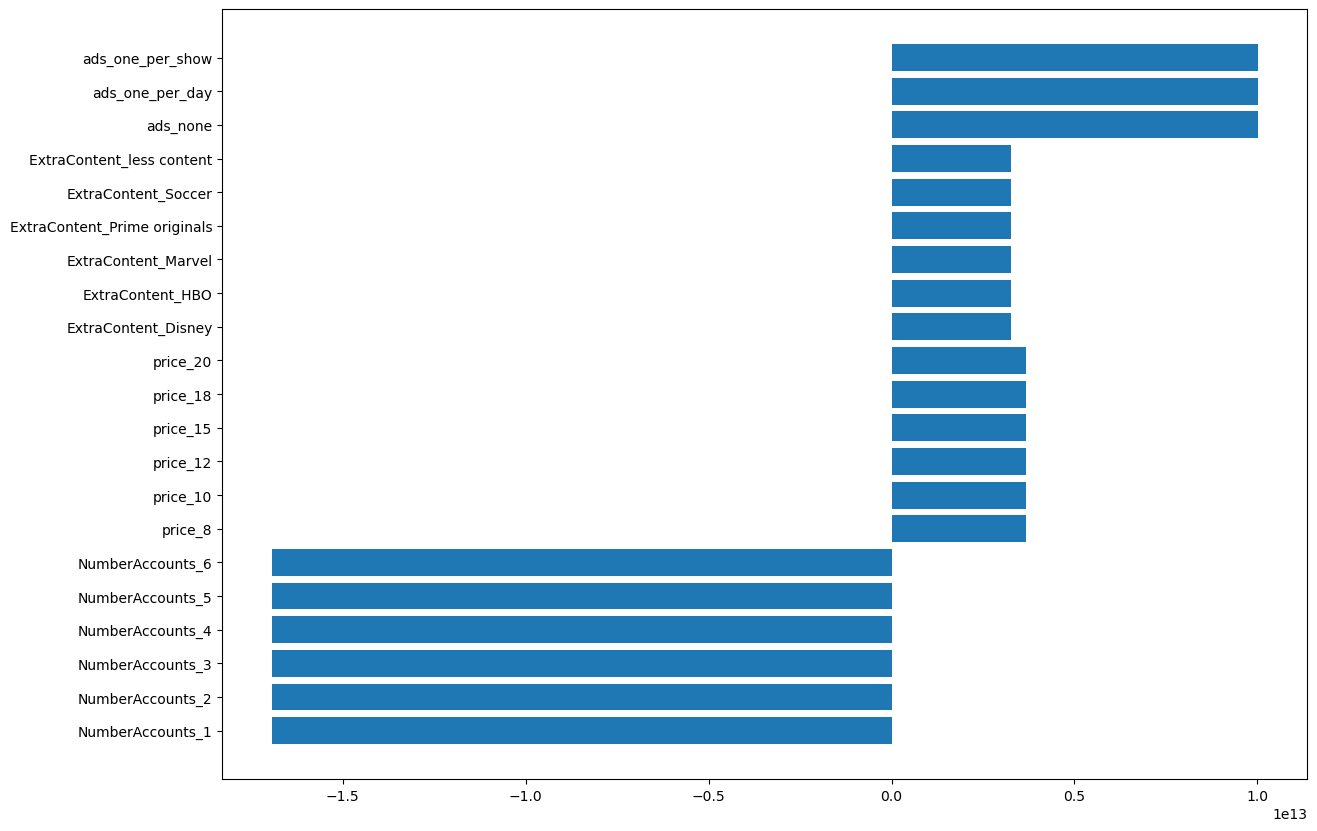

In [31]:
# Plotting the Partworth
f,ax = plt.subplots(figsize=(14,10))
values = df_result.partworth
xbar = np.arange(len(values))
plt.barh(xbar,
         values)
plt.yticks(xbar,labels=df_result['param_name'])
plt.show()